<a href="https://colab.research.google.com/github/omarffkamel/mlevaulation/blob/main/machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

data_file = 'Debernardi et al 2020 data.csv'
data = pd.read_csv(data_file)


In [2]:
# Display the first few rows of the dataframe
print(data.head())

# Display basic information about the dataset
print("Data Types and Non-Null Counts:")
print(data.info())

print("\nSummary Statistics:")
print(data.describe(include='all'))

print("\nMissing Values Per Column:")
print(data.isnull().sum())


  sample_id patient_cohort sample_origin  age sex  diagnosis stage  \
0        S1        Cohort1          BPTB   33   F          1   NaN   
1       S10        Cohort1          BPTB   81   F          1   NaN   
2      S100        Cohort2          BPTB   51   M          1   NaN   
3      S101        Cohort2          BPTB   61   M          1   NaN   
4      S102        Cohort2          BPTB   62   M          1   NaN   

  benign_sample_diagnosis  plasma_CA19_9  creatinine     LYVE1      REG1B  \
0                     NaN           11.7     1.83222  0.893219   52.94884   
1                     NaN            NaN     0.97266  2.037585   94.46703   
2                     NaN            7.0     0.78039  0.145589  102.36600   
3                     NaN            8.0     0.70122  0.002805   60.57900   
4                     NaN            9.0     0.21489  0.000860   65.54000   

         TFF1     REG1A  
0  654.282174  1262.000  
1  209.488250   228.407  
2  461.141000       NaN  
3  142.95000

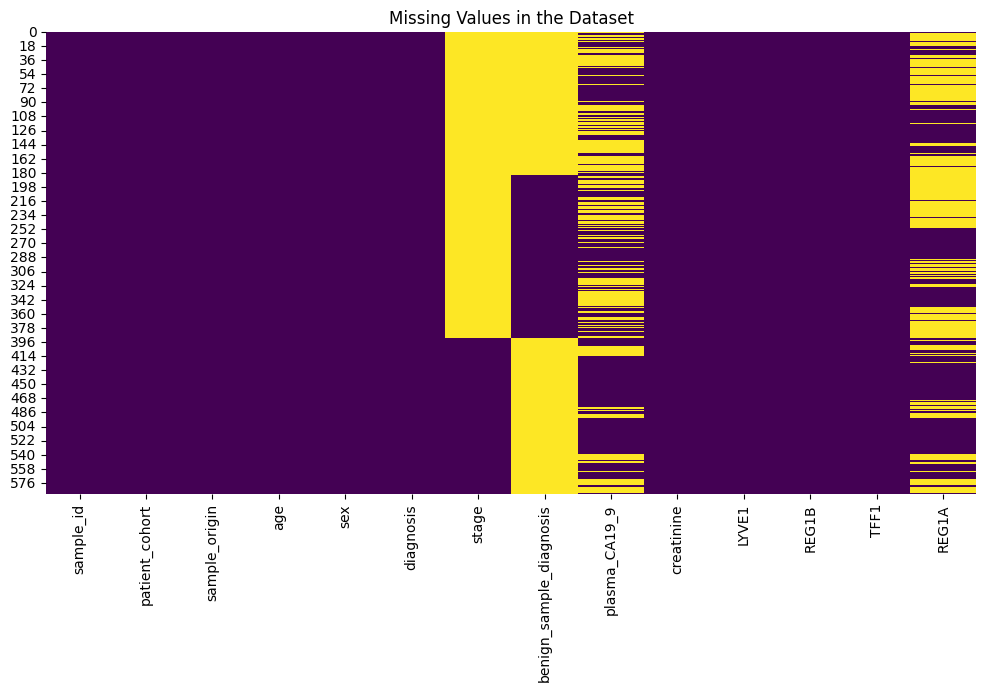

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the missing values in the dataset
plt.figure(figsize=(12, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values in the Dataset')
plt.show()


In [4]:
threshold = len(data) * 0.5
data = data.dropna(thresh=threshold, axis=1)

In [5]:
columns_to_drop = ['stage', 'sample_id', 'sample_origin', 'benign_sample_diagnosis', 'REG1A', 'plasma_CA19_9']
columns_to_drop = [col for col in columns_to_drop if col in data.columns]
data.drop(columns=columns_to_drop, inplace=True)
data.head()

<ipython-input-5-19dc237d3c46>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns=columns_to_drop, inplace=True)


,patient_cohort,age,sex,diagnosis,creatinine,LYVE1,REG1B,TFF1
0,Cohort1,33,F,1,1.83222,0.893219,52.94884,654.282174
1,Cohort1,81,F,1,0.97266,2.037585,94.46703,209.488250
2,Cohort2,51,M,1,0.78039,0.145589,102.36600,461.141000
3,Cohort2,61,M,1,0.70122,0.002805,60.57900,142.950000
4,Cohort2,62,M,1,0.21489,0.000860,65.54000,41.088000


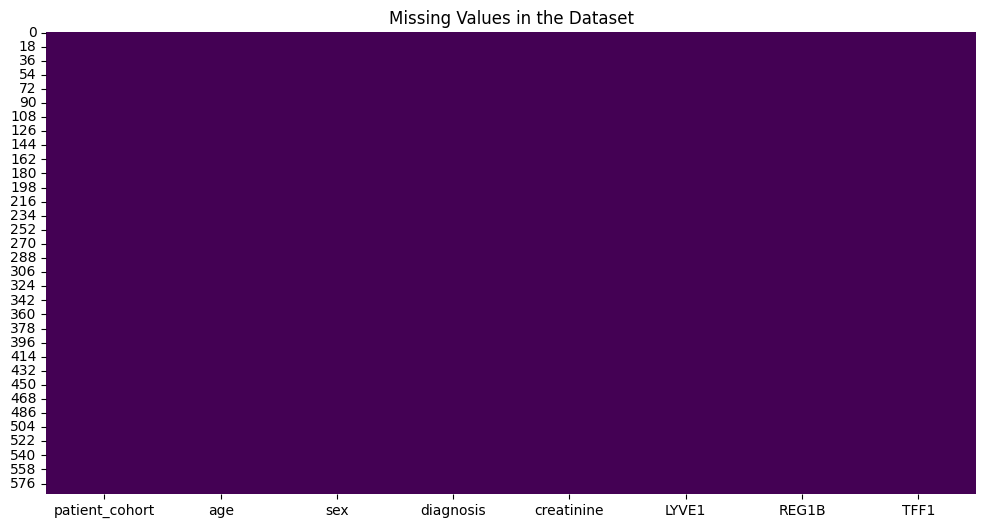

In [6]:
# Visualize the missing values in the dataset
plt.figure(figsize=(12, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values in the Dataset')
plt.show()

In [7]:
# 1=female, 0=male
# 0=cohrt1, 1=cohort2
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
categorical_columns = ['sex', 'patient_cohort']

for column in categorical_columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Convert diagnosis to binary
data['diagnosis_binary'] = data['diagnosis'].apply(lambda x: 1 if x == 1 else 0)
data = data.drop('diagnosis', axis=1)



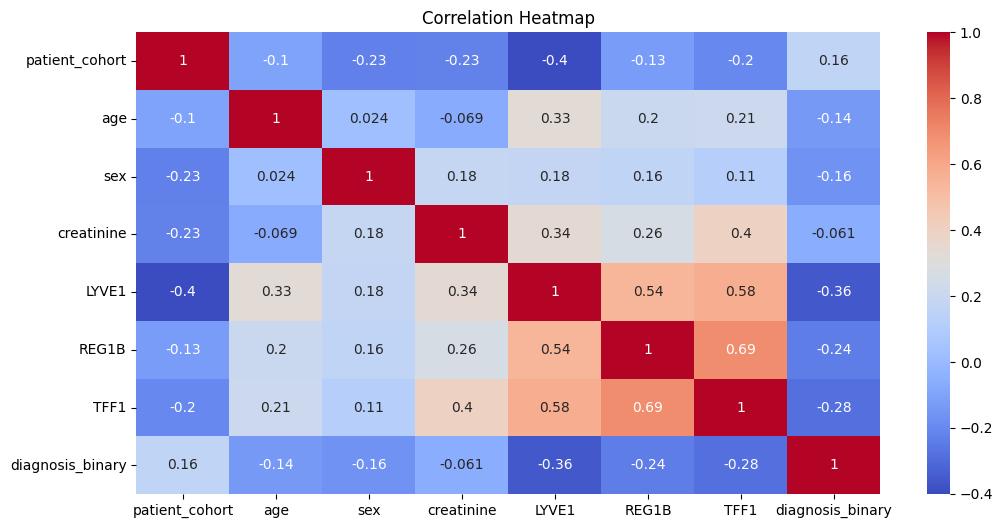

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt



# Correlation heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [9]:
# Check for class imbalance
print("Class Distribution in Target Variable:")
print(data['diagnosis_binary'].value_counts())

Class Distribution in Target Variable:
diagnosis_binary
0    407
1    183
Name: count, dtype: int64


In [10]:
data.head()

,patient_cohort,age,sex,creatinine,LYVE1,REG1B,TFF1,diagnosis_binary
0,0,33,0,1.83222,0.893219,52.94884,654.282174,1
1,0,81,0,0.97266,2.037585,94.46703,209.488250,1
2,1,51,1,0.78039,0.145589,102.36600,461.141000,1
3,1,61,1,0.70122,0.002805,60.57900,142.950000,1
4,1,62,1,0.21489,0.000860,65.54000,41.088000,1


In [11]:
# Create interaction feature between REG1B and TFF1
data['REG1B_TFF1_interaction'] = data['REG1B'] * data['TFF1']

# Apply log transformation to creatinine if necessary
data['log_creatinine'] = np.log1p(data['creatinine'])

# Drop the original creatinine column if not needed
data.drop(columns=['creatinine'], inplace=True)

# Display the first few rows to confirm changes
print(data.head())


   patient_cohort  age  sex     LYVE1      REG1B        TFF1  \
0               0   33    0  0.893219   52.94884  654.282174   
1               0   81    0  2.037585   94.46703  209.488250   
2               1   51    1  0.145589  102.36600  461.141000   
3               1   61    1  0.002805   60.57900  142.950000   
4               1   62    1  0.000860   65.54000   41.088000   

   diagnosis_binary  REG1B_TFF1_interaction  log_creatinine  
0                 1            34643.482146        1.041061  
1                 1            19789.732797        0.679383  
2                 1            47205.159606        0.576832  
3                 1             8659.768050        0.531346  
4                 1             2692.907520        0.194654  


Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best Random Search Parameters: {'subsample': 0.8, 'scale_pos_weight': 1, 'reg_lambda': 1, 'reg_alpha': 0.01, 'n_estimators': 200, 'min_child_weight': 1, 'max_depth': 5, 'learning_rate': 0.01, 'gamma': 0.1, 'colsample_bytree': 1.0}


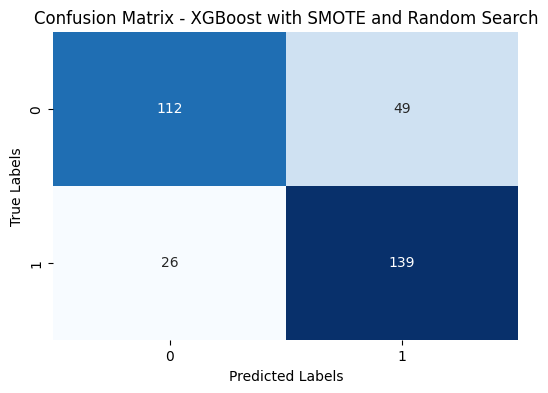

Accuracy for XGBoost with SMOTE and Random Search: 0.7699386503067485

Classification Report for XGBoost with SMOTE and Random Search:
              precision    recall  f1-score   support

           0       0.81      0.70      0.75       161
           1       0.74      0.84      0.79       165

    accuracy                           0.77       326
   macro avg       0.78      0.77      0.77       326
weighted avg       0.78      0.77      0.77       326



In [12]:
from imblearn.over_sampling import SMOTE
import xgboost as xgb
from xgboost import XGBClassifier

# Select important features based on correlation with the target variable
selected_features = [ 'LYVE1', 'TFF1', 'REG1B']

# Prepare feature set and target variable
X = data[selected_features]
y = data['diagnosis_binary']

# Apply SMOTE for handling class imbalance
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.4, random_state=42)

# Define parameter grid for XGBoost
param_grid = {
  'scale_pos_weight': [1, 2, 3, 4, 5],  # Adjust weights for positive class (more important with SMOTE)
  'learning_rate': [0.0005, 0.001, 0.005, 0.01, 0.02],  # Might need lower learning rates with SMOTE
  'max_depth': [3, 5, 7, 9],
  'n_estimators': [50, 100, 200, 300],
  'subsample': [0.5, 0.7, 0.8, 1.0],  # Experiment with different subsampling rates
  'colsample_bytree': [0.5, 0.7, 0.8, 1.0],  # Experiment with different feature sampling rates
  'gamma': [0, 0.01, 0.1, 1],  # Controls minimum loss reduction required for a split
  'min_child_weight': [1, 3, 5, 7],  # Minimum sum of weights required for a child node
  'reg_alpha': [0, 0.01, 0.1, 1],  # L1 regularization term
  'reg_lambda': [0, 0.01, 0.1, 1]   # L2 regularization term
}


# Initialize XGBoost classifier
xgb = XGBClassifier(random_state=42)

# Perform RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=xgb, param_distributions=param_grid, n_iter=50, scoring='accuracy', cv=3, verbose=1, random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train)

# Best parameters from RandomizedSearchCV
print("Best Random Search Parameters:", random_search.best_params_)

# Predict using the best estimator
y_pred_xgb = random_search.best_estimator_.predict(X_test)

# Function to plot confusion matrix (assuming you have libraries like matplotlib and seaborn imported)
def plot_confusion_matrix(y_true, y_pred, title):
  cm = confusion_matrix(y_true, y_pred)
  plt.figure(figsize=(6, 4))
  sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
  plt.xlabel('Predicted Labels')
  plt.ylabel('True Labels')
  plt.title(title)
  plt.show()

# Plot confusion matrix for XGBoost
plot_confusion_matrix(y_test, y_pred_xgb, "Confusion Matrix - XGBoost with SMOTE and Random Search")

# Evaluate model performance
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print("Accuracy for XGBoost with SMOTE and Random Search:", accuracy_xgb)
print("\nClassification Report for XGBoost with SMOTE and Random Search:")
print(classification_report(y_test, y_pred_xgb))






Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best Random Search Parameters: {'subsample': 1.0, 'scale_pos_weight': 1, 'reg_lambda': 0, 'reg_alpha': 0.1, 'n_estimators': 300, 'min_child_weight': 1, 'max_depth': 7, 'learning_rate': 0.01, 'gamma': 0.01, 'colsample_bytree': 0.5}


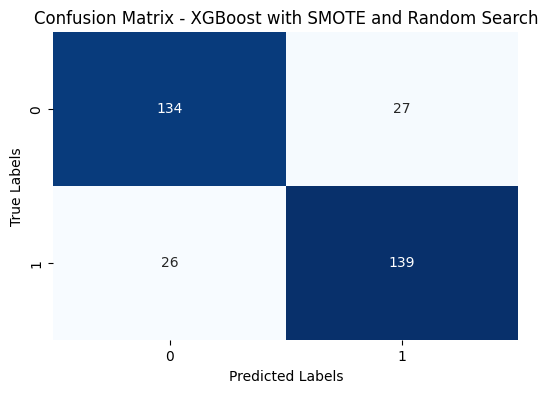

Accuracy for XGBoost with SMOTE and Random Search: 0.8374233128834356

Classification Report for XGBoost with SMOTE and Random Search:
              precision    recall  f1-score   support

           0       0.84      0.83      0.83       161
           1       0.84      0.84      0.84       165

    accuracy                           0.84       326
   macro avg       0.84      0.84      0.84       326
weighted avg       0.84      0.84      0.84       326



In [15]:
from imblearn.over_sampling import SMOTE
import xgboost as xgb
from xgboost import XGBClassifier

# Select important features based on correlation with the target variable
selected_features = ['patient_cohort','age','sex','LYVE1','REG1B','TFF1','log_creatinine' ]

# Prepare feature set and target variable
X = data[selected_features]
y = data['diagnosis_binary']

# Apply SMOTE for handling class imbalance
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.4, random_state=42)

# Define parameter grid for XGBoost
param_grid = {
  'scale_pos_weight': [1, 2, 3, 4, 5],  # Adjust weights for positive class (more important with SMOTE)
  'learning_rate': [0.0005, 0.001, 0.005, 0.01, 0.02],  # Might need lower learning rates with SMOTE
  'max_depth': [3, 5, 7, 9],
  'n_estimators': [50, 100, 200, 300],
  'subsample': [0.5, 0.7, 0.8, 1.0],  # Experiment with different subsampling rates
  'colsample_bytree': [0.5, 0.7, 0.8, 1.0],  # Experiment with different feature sampling rates
  'gamma': [0, 0.01, 0.1, 1],  # Controls minimum loss reduction required for a split
  'min_child_weight': [1, 3, 5, 7],  # Minimum sum of weights required for a child node
  'reg_alpha': [0, 0.01, 0.1, 1],  # L1 regularization term
  'reg_lambda': [0, 0.01, 0.1, 1]   # L2 regularization term
}


# Initialize XGBoost classifier
xgb = XGBClassifier(random_state=42)

# Perform RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=xgb, param_distributions=param_grid, n_iter=50, scoring='accuracy', cv=3, verbose=1, random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train)

# Best parameters from RandomizedSearchCV
print("Best Random Search Parameters:", random_search.best_params_)

# Predict using the best estimator
y_pred_xgb = random_search.best_estimator_.predict(X_test)

# Function to plot confusion matrix (assuming you have libraries like matplotlib and seaborn imported)
def plot_confusion_matrix(y_true, y_pred, title):
  cm = confusion_matrix(y_true, y_pred)
  plt.figure(figsize=(6, 4))
  sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
  plt.xlabel('Predicted Labels')
  plt.ylabel('True Labels')
  plt.title(title)
  plt.show()

# Plot confusion matrix for XGBoost
plot_confusion_matrix(y_test, y_pred_xgb, "Confusion Matrix - XGBoost with SMOTE and Random Search")

# Evaluate model performance
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print("Accuracy for XGBoost with SMOTE and Random Search:", accuracy_xgb)
print("\nClassification Report for XGBoost with SMOTE and Random Search:")
print(classification_report(y_test, y_pred_xgb))






Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best Random Search Parameters: {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 10}


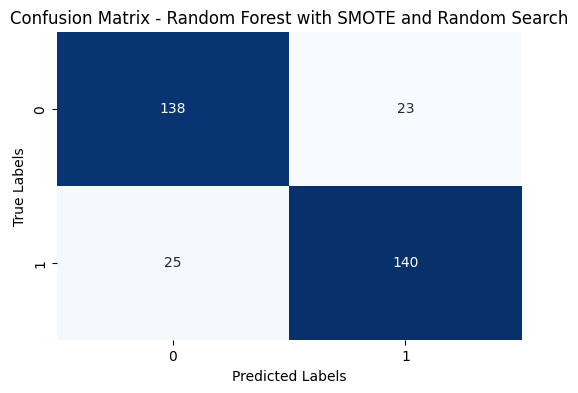

Accuracy for Random Forest with SMOTE and Random Search: 0.852760736196319

Classification Report for Random Forest with SMOTE and Random Search:
              precision    recall  f1-score   support

           0       0.85      0.86      0.85       161
           1       0.86      0.85      0.85       165

    accuracy                           0.85       326
   macro avg       0.85      0.85      0.85       326
weighted avg       0.85      0.85      0.85       326



In [16]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns  # Assuming seaborn is installed

# Select important features based on correlation with the target variable
selected_features = [ 'patient_cohort','age','sex','LYVE1','REG1B','TFF1','log_creatinine']

# Prepare feature set and target variable
X = data[selected_features]
y = data['diagnosis_binary']

# Apply SMOTE for handling class imbalance
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.4, random_state=42)

# Define parameter grid for Random Forest
param_grid = {
  'n_estimators': [100, 200, 300],
  'max_depth': [3, 5, 7, 10],
  'min_samples_split': [2, 5, 10],
  'min_samples_leaf': [1, 2, 4],
  'max_features': ['auto', 'sqrt', 'log2']  # Experiment with different feature selection strategies
}

# Initialize Random Forest classifier
rf = RandomForestClassifier(random_state=42)

# Perform RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, n_iter=50, scoring='accuracy', cv=3, verbose=1, random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train)

# Best parameters from RandomizedSearchCV
print("Best Random Search Parameters:", random_search.best_params_)

# Predict using the best estimator
y_pred_rf = random_search.best_estimator_.predict(X_test)

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
  cm = confusion_matrix(y_true, y_pred)
  plt.figure(figsize=(6, 4))
  sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
  plt.xlabel('Predicted Labels')
  plt.ylabel('True Labels')
  plt.title(title)
  plt.show()

# Plot confusion matrix for Random Forest
plot_confusion_matrix(y_test, y_pred_rf, "Confusion Matrix - Random Forest with SMOTE and Random Search")

# Evaluate model performance
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy for Random Forest with SMOTE and Random Search:", accuracy_rf)
print("\nClassification Report for Random Forest with SMOTE and Random Search:")
print(classification_report(y_test, y_pred_rf))


In [19]:
from sklearn.preprocessing import MinMaxScaler

# Normalize specific features with MinMaxScaler
scaler = MinMaxScaler()

# Select the columns to be normalized
columns_to_normalize = ['REG1B', 'TFF1']

# Fit the scaler on the selected columns
scaler.fit(data[columns_to_normalize])

# Transform the selected columns
data[columns_to_normalize] = scaler.transform(data[columns_to_normalize])

# Check the first few rows to confirm normalization
print(data[columns_to_normalize].head())






      REG1B      TFF1
0  0.037715  0.049030
1  0.067288  0.015698
2  0.072915  0.034557
3  0.043150  0.010712
4  0.046684  0.003079


Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best Random Search Parameters: {'subsample': 0.5, 'scale_pos_weight': 1, 'reg_lambda': 0, 'reg_alpha': 1, 'n_estimators': 100, 'min_child_weight': 1, 'max_depth': 9, 'learning_rate': 0.02, 'gamma': 0, 'colsample_bytree': 0.8}


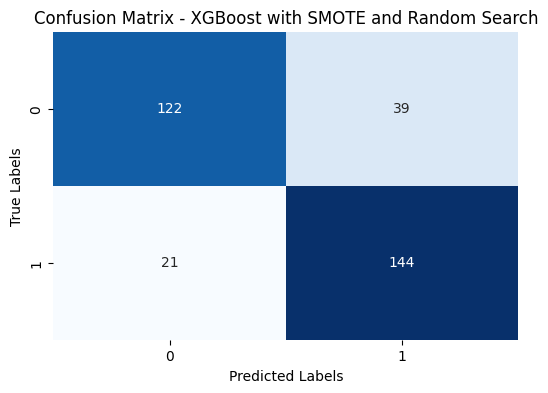

Accuracy for XGBoost with SMOTE and Random Search: 0.8159509202453987

Classification Report for XGBoost with SMOTE and Random Search:
              precision    recall  f1-score   support

           0       0.85      0.76      0.80       161
           1       0.79      0.87      0.83       165

    accuracy                           0.82       326
   macro avg       0.82      0.82      0.82       326
weighted avg       0.82      0.82      0.82       326



In [20]:
from imblearn.over_sampling import SMOTE
import xgboost as xgb
from xgboost import XGBClassifier

# Select important features based on correlation with the target variable
selected_features = [ 'patient_cohort','age','sex','LYVE1','REG1B','TFF1','log_creatinine']

# Prepare feature set and target variable
X = data[selected_features]
y = data['diagnosis_binary']

# Apply SMOTE for handling class imbalance
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.4, random_state=42)

# Define parameter grid for XGBoost
param_grid = {
  'scale_pos_weight': [1, 2, 3, 4, 5],  # Adjust weights for positive class (more important with SMOTE)
  'learning_rate': [0.0005, 0.001, 0.005, 0.01, 0.02],  # Might need lower learning rates with SMOTE
  'max_depth': [3, 5, 7, 9],
  'n_estimators': [50, 100, 200, 300],
  'subsample': [0.5, 0.7, 0.8, 1.0],  # Experiment with different subsampling rates
  'colsample_bytree': [0.5, 0.7, 0.8, 1.0],  # Experiment with different feature sampling rates
  'gamma': [0, 0.01, 0.1, 1],  # Controls minimum loss reduction required for a split
  'min_child_weight': [1, 3, 5, 7],  # Minimum sum of weights required for a child node
  'reg_alpha': [0, 0.01, 0.1, 1],  # L1 regularization term
  'reg_lambda': [0, 0.01, 0.1, 1]   # L2 regularization term
}


# Initialize XGBoost classifier
xgb = XGBClassifier(random_state=42)

# Perform RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=xgb, param_distributions=param_grid, n_iter=50, scoring='accuracy', cv=3, verbose=1, random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train)

# Best parameters from RandomizedSearchCV
print("Best Random Search Parameters:", random_search.best_params_)

# Predict using the best estimator
y_pred_xgb = random_search.best_estimator_.predict(X_test)

# Function to plot confusion matrix (assuming you have libraries like matplotlib and seaborn imported)
def plot_confusion_matrix(y_true, y_pred, title):
  cm = confusion_matrix(y_true, y_pred)
  plt.figure(figsize=(6, 4))
  sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
  plt.xlabel('Predicted Labels')
  plt.ylabel('True Labels')
  plt.title(title)
  plt.show()

# Plot confusion matrix for XGBoost
plot_confusion_matrix(y_test, y_pred_xgb, "Confusion Matrix - XGBoost with SMOTE and Random Search")

# Evaluate model performance
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print("Accuracy for XGBoost with SMOTE and Random Search:", accuracy_xgb)
print("\nClassification Report for XGBoost with SMOTE and Random Search:")
print(classification_report(y_test, y_pred_xgb))






Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best Random Search Parameters: {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 10}


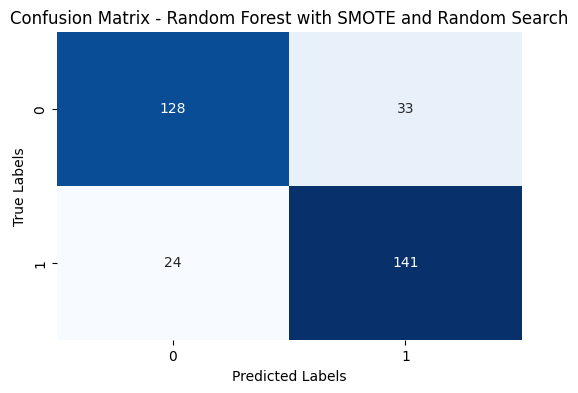

Accuracy for Random Forest with SMOTE and Random Search: 0.8251533742331288

Classification Report for Random Forest with SMOTE and Random Search:
              precision    recall  f1-score   support

           0       0.84      0.80      0.82       161
           1       0.81      0.85      0.83       165

    accuracy                           0.83       326
   macro avg       0.83      0.82      0.82       326
weighted avg       0.83      0.83      0.82       326



In [21]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns  # Assuming seaborn is installed

# Select important features based on correlation with the target variable
selected_features = [ 'patient_cohort','age','sex','LYVE1','REG1B','TFF1','log_creatinine']

# Prepare feature set and target variable
X = data[selected_features]
y = data['diagnosis_binary']

# Apply SMOTE for handling class imbalance
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.4, random_state=42)

# Define parameter grid for Random Forest
param_grid = {
  'n_estimators': [100, 200, 300],
  'max_depth': [3, 5, 7, 10],
  'min_samples_split': [2, 5, 10],
  'min_samples_leaf': [1, 2, 4],
  'max_features': ['auto', 'sqrt', 'log2']  # Experiment with different feature selection strategies
}

# Initialize Random Forest classifier
rf = RandomForestClassifier(random_state=42)

# Perform RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, n_iter=50, scoring='accuracy', cv=3, verbose=1, random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train)

# Best parameters from RandomizedSearchCV
print("Best Random Search Parameters:", random_search.best_params_)

# Predict using the best estimator
y_pred_rf = random_search.best_estimator_.predict(X_test)

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
  cm = confusion_matrix(y_true, y_pred)
  plt.figure(figsize=(6, 4))
  sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
  plt.xlabel('Predicted Labels')
  plt.ylabel('True Labels')
  plt.title(title)
  plt.show()

# Plot confusion matrix for Random Forest
plot_confusion_matrix(y_test, y_pred_rf, "Confusion Matrix - Random Forest with SMOTE and Random Search")

# Evaluate model performance
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy for Random Forest with SMOTE and Random Search:", accuracy_rf)
print("\nClassification Report for Random Forest with SMOTE and Random Search:")
print(classification_report(y_test, y_pred_rf))
